<a href="https://colab.research.google.com/github/Sushila-Phogat/CE888/blob/master/Incurred_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Data



In [1]:
import pandas as pd
df=pd.read_excel('/content/Data_Scientist_Interview_Task.xlsx', sheet_name='Data')
print("Shape of Data: ", df.shape)
df.head(10)

Shape of Data:  (7691, 46)


,Claim Number,date_of_loss,Notifier,Loss_code,Loss_description,Notification_period,Inception_to_loss,Location_of_incident,Weather_conditions,Vehicle_mobile,Time_hour,Main_driver,PH_considered_TP_at_fault,Vechile_registration_present,Incident_details_present,Injury_details_present,TP_type_insd_pass_back,TP_type_insd_pass_front,TP_type_driver,TP_type_pass_back,TP_type_pass_front,TP_type_bike,TP_type_cyclist,TP_type_pass_multi,TP_type_pedestrian,TP_type_other,TP_type_nk,TP_injury_whiplash,TP_injury_traumatic,TP_injury_fatality,TP_injury_unclear,TP_injury_nk,TP_region_eastang,TP_region_eastmid,TP_region_london,TP_region_north,TP_region_northw,TP_region_outerldn,TP_region_scotland,TP_region_southe,TP_region_southw,TP_region_wales,TP_region_westmid,TP_region_yorkshire,Incurred,Capped Incurred
0,1,2003-04-15,PH,LD003,Head on collision,22,13,Main Road,NORMAL,Y,10,Other,n/k,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.000000,0.000000
1,2,2003-04-20,CNF,LD003,Head on collision,1,9,Main Road,WET,Y,18,Other,n/k,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,2801.308013,4074.670583
2,3,2003-04-24,CNF,LD003,Head on collision,5,17,Main Road,WET,Y,16,Y,n/k,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1220.870390,1775.829235
3,4,2003-05-13,CNF,LD003,Head on collision,1,23,Main Road,N/K,Y,14,Other,n/k,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,3529.868026,5134.404835
4,5,2003-06-11,CNF,LD003,Head on collision,1,48,Other,N/K,N,9,Other,n/k,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,3155.987923,4590.573794
5,6,2003-06-24,PH,LD003,Head on collision,16,23,Other,N/K,N,0,Other,n/k,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,10502.083202,15275.910142
6,7,2003-07-16,Other,LD003,Head on collision,5,4,Main Road,NORMAL,N,18,Other,n/k,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,91.142730,132.572569
7,8,2003-07-17,Other,LD003,Head on collision,0,40,Main Road,WET,Y,7,Other,n/k,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,9129.967662,13280.085763
8,9,2003-07-20,PH,LD003,Head on collision,4,26,Minor Road,WET,Y,22,Other,n/k,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,81.018992,117.846985
9,10,2003-07-29,CNF,LD003,Head on collision,2,85,Main Road,N/K,N,22,Other,n/k,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,446.579011,649.575967


#Data Information

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7691 entries, 0 to 7690
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Claim Number                  7691 non-null   int64  
 1   date_of_loss                  7691 non-null   object 
 2   Notifier                      7691 non-null   object 
 3   Loss_code                     7691 non-null   object 
 4   Loss_description              7691 non-null   object 
 5   Notification_period           7691 non-null   int64  
 6   Inception_to_loss             7691 non-null   int64  
 7   Location_of_incident          7691 non-null   object 
 8   Weather_conditions            7346 non-null   object 
 9   Vehicle_mobile                7691 non-null   object 
 10  Time_hour                     7691 non-null   int64  
 11  Main_driver                   7691 non-null   object 
 12  PH_considered_TP_at_fault     7691 non-null   object 
 13  Vec

#Data Description

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Claim Number,7691.0,3846.000000,2220.344793,1.000000,1923.50000,3846.000000,5768.500000,7.691000e+03
Notification_period,7691.0,7.163438,39.138209,-18.000000,0.00000,1.000000,2.000000,1.042000e+03
Inception_to_loss,7691.0,166.854505,104.452906,0.000000,75.00000,161.000000,253.000000,3.650000e+02
Time_hour,7691.0,12.729684,5.107136,0.000000,9.00000,13.000000,17.000000,2.300000e+01
Vechile_registration_present,7691.0,0.999220,0.027922,0.000000,1.00000,1.000000,1.000000,1.000000e+00
Incident_details_present,7691.0,0.808347,0.393627,0.000000,1.00000,1.000000,1.000000,1.000000e+00
Injury_details_present,7691.0,0.232089,0.422193,0.000000,0.00000,0.000000,0.000000,1.000000e+00
TP_type_insd_pass_back,7691.0,0.028995,0.219508,0.000000,0.00000,0.000000,0.000000,4.000000e+00
TP_type_insd_pass_front,7691.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000e+00
TP_type_driver,7691.0,0.651671,0.544726,0.000000,0.00000,1.000000,1.000000,5.000000e+00


In [4]:
object_col=df.select_dtypes(exclude=['int64','float64']).columns
object_col

Index(['date_of_loss', 'Notifier', 'Loss_code', 'Loss_description',
       'Location_of_incident', 'Weather_conditions', 'Vehicle_mobile',
       'Main_driver', 'PH_considered_TP_at_fault'],
      dtype='object')

In [5]:
numeric_col=df.select_dtypes(exclude=['object']).columns
numeric_col

Index(['Claim Number', 'Notification_period', 'Inception_to_loss', 'Time_hour',
       'Vechile_registration_present', 'Incident_details_present',
       'Injury_details_present', 'TP_type_insd_pass_back',
       'TP_type_insd_pass_front', 'TP_type_driver', 'TP_type_pass_back',
       'TP_type_pass_front', 'TP_type_bike', 'TP_type_cyclist',
       'TP_type_pass_multi', 'TP_type_pedestrian', 'TP_type_other',
       'TP_type_nk', 'TP_injury_whiplash', 'TP_injury_traumatic',
       'TP_injury_fatality', 'TP_injury_unclear', 'TP_injury_nk',
       'TP_region_eastang', 'TP_region_eastmid', 'TP_region_london',
       'TP_region_north', 'TP_region_northw', 'TP_region_outerldn',
       'TP_region_scotland', 'TP_region_southe', 'TP_region_southw',
       'TP_region_wales', 'TP_region_westmid', 'TP_region_yorkshire',
       'Incurred', 'Capped Incurred'],
      dtype='object')

#Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


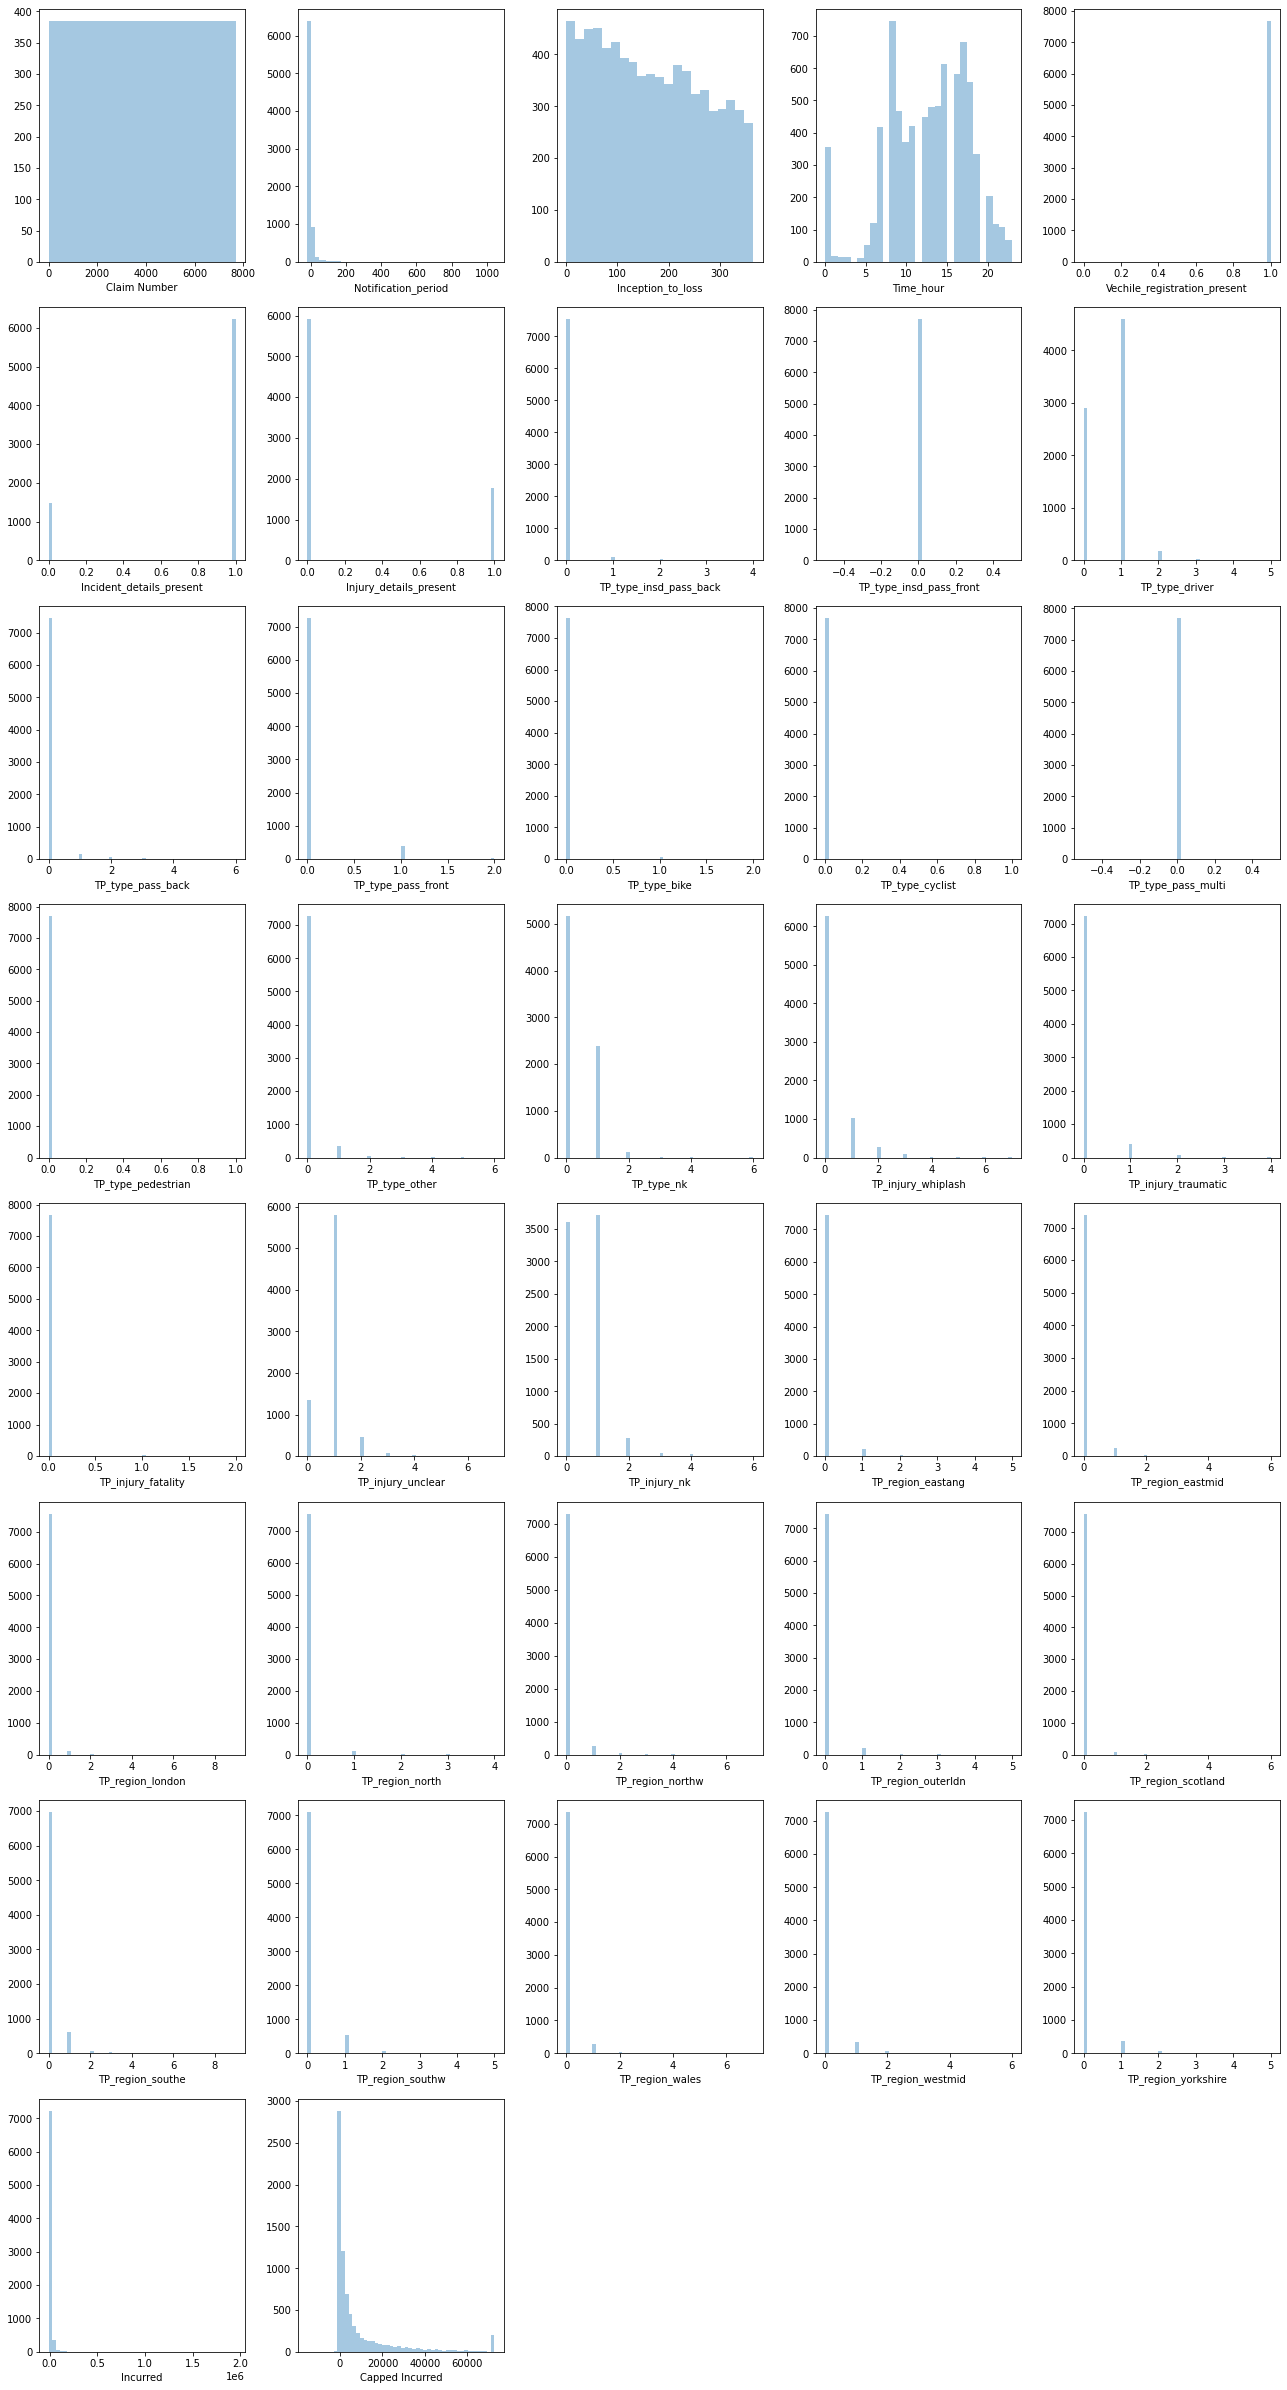

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(18,37))
for index,col in enumerate(numeric_col):
    plt.subplot(9,5,index+1)
    sns.distplot(df[col], kde=False)
fig.tight_layout(pad=1.0)

####Claim number is constant distribution and having unique value for each row in whole data range. And Most of columns are having two type of data 0 or 1. A few column like notification_period, inception_to_loss, time_hour are having a flexible range.

#Boxplot for Each Numeric feature to check statistical characteristics

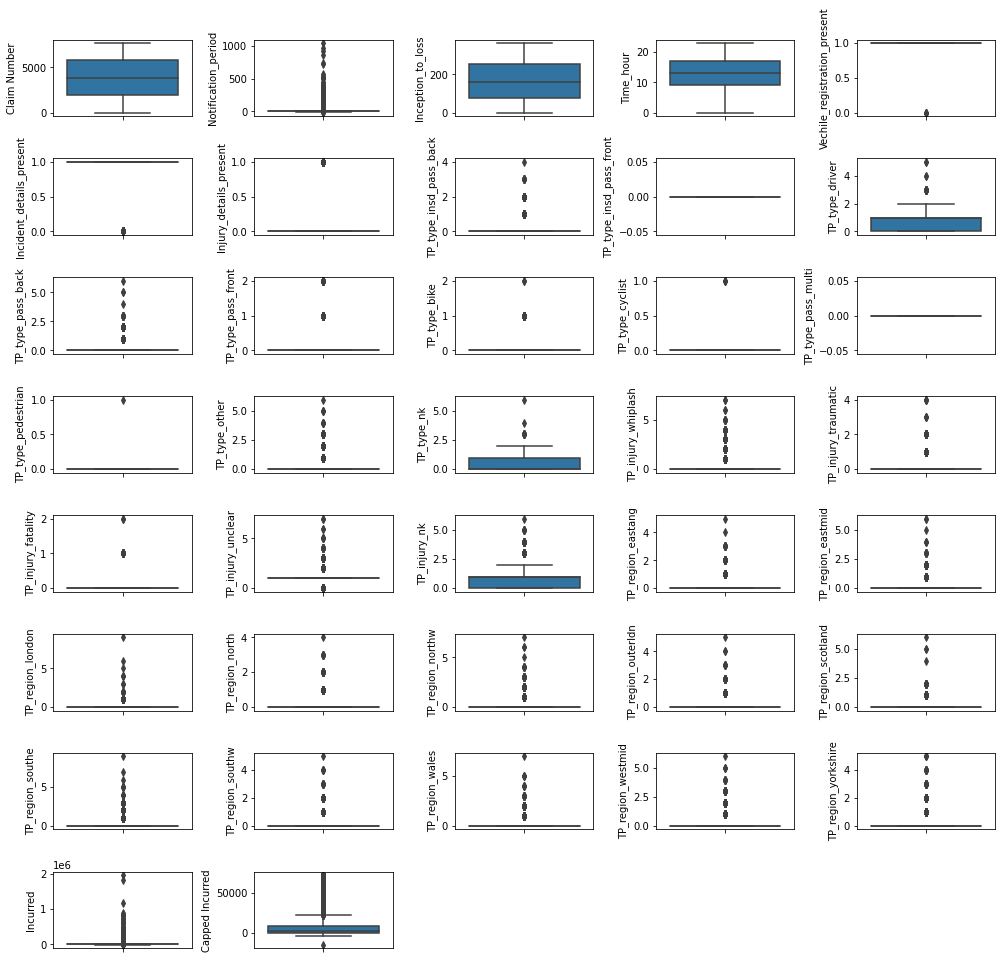

In [7]:
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(numeric_col):
    plt.subplot(9,5,index+1)
    sns.boxplot(y=col, data=df)
fig.tight_layout(pad=1.0)

####Upon seeing the box plot, no particular outlier highlighted for the features.

#Count plot for Categorical Features

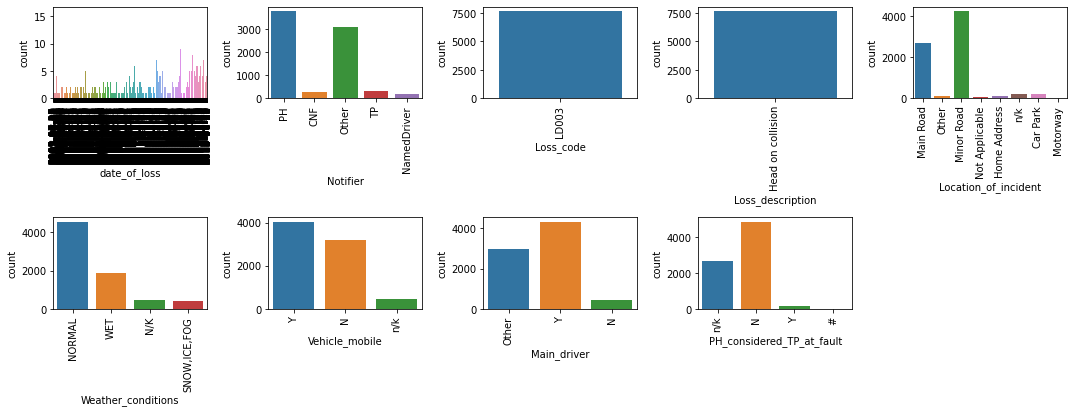

In [8]:
fig = plt.figure(figsize=(15,25))
for index in range(len(object_col)):
    plt.subplot(9,5,index+1)
    sns.countplot(x=object_col[index], data=df)
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.0)

#Bivariate Analysis

In [9]:
df.corr()

,Claim Number,Notification_period,Inception_to_loss,Time_hour,Vechile_registration_present,Incident_details_present,Injury_details_present,TP_type_insd_pass_back,TP_type_insd_pass_front,TP_type_driver,TP_type_pass_back,TP_type_pass_front,TP_type_bike,TP_type_cyclist,TP_type_pass_multi,TP_type_pedestrian,TP_type_other,TP_type_nk,TP_injury_whiplash,TP_injury_traumatic,TP_injury_fatality,TP_injury_unclear,TP_injury_nk,TP_region_eastang,TP_region_eastmid,TP_region_london,TP_region_north,TP_region_northw,TP_region_outerldn,TP_region_scotland,TP_region_southe,TP_region_southw,TP_region_wales,TP_region_westmid,TP_region_yorkshire,Incurred,Capped Incurred
Claim Number,1.000000,0.025530,0.028475,-0.000915,0.011457,0.222212,-0.021876,0.019044,NaN,0.600639,0.029787,0.027346,0.014106,0.015278,NaN,0.018578,-0.082157,-0.628396,0.041255,0.077086,0.002063,-0.085607,0.155294,-0.031657,-0.021484,0.003510,-0.010310,-0.015316,-0.011342,0.005306,-0.070363,-0.084407,-0.019424,-0.003100,-0.022720,-0.022306,-0.023388
Notification_period,0.025530,1.000000,-0.020626,-0.155798,-0.001668,-0.049937,-0.067717,-0.005819,NaN,-0.012279,0.002800,-0.000113,0.014639,0.017100,NaN,-0.001505,-0.009592,-0.035426,0.011317,-0.009350,0.018800,-0.061934,-0.000653,-0.011405,0.006302,0.028164,-0.004243,-0.018575,-0.016317,-0.006561,-0.005133,-0.023767,-0.010194,-0.011432,-0.013753,0.000417,-0.019503
Inception_to_loss,0.028475,-0.020626,1.000000,-0.007286,0.012044,0.014345,-0.011890,-0.030567,NaN,0.012161,-0.003796,0.006434,-0.009516,0.021162,NaN,0.000016,-0.007619,-0.013764,-0.002301,-0.004191,-0.016584,-0.009522,-0.007189,0.026038,-0.002305,-0.003457,-0.005161,-0.007650,-0.001820,-0.014616,-0.011487,0.002465,-0.016229,0.022690,-0.012383,0.005833,-0.004767
Time_hour,-0.000915,-0.155798,-0.007286,1.000000,-0.010598,0.023840,0.103582,0.059075,NaN,0.015884,0.003888,0.033936,0.018841,-0.001026,NaN,0.005070,-0.005864,-0.010687,0.048503,0.022332,0.006155,0.012318,0.002278,0.017692,0.011472,0.008027,0.024840,0.021261,-0.002380,0.001272,0.004797,0.020704,0.014413,0.012749,0.012338,0.008816,0.025716
Vechile_registration_present,0.011457,-0.001668,0.012044,-0.010598,1.000000,-0.013605,0.004330,0.003691,NaN,-0.000769,-0.012760,0.006621,0.002311,0.000637,NaN,0.000319,-0.046414,-0.008043,-0.017565,0.006660,0.001580,-0.070786,-0.017462,0.004556,0.004976,0.002802,0.003725,0.005360,0.004462,0.002967,-0.025613,-0.006301,-0.114365,0.005854,0.006106,0.003849,0.008974
Incident_details_present,0.222212,-0.049937,0.014345,0.023840,-0.013605,1.000000,0.097889,0.019172,NaN,0.223523,0.018741,0.013479,0.002749,-0.003382,NaN,0.005553,-0.000386,-0.237998,0.032343,0.014771,-0.008380,-0.015717,0.051771,0.000097,-0.009086,-0.001819,-0.003809,0.014705,-0.000489,0.004096,-0.025838,-0.009740,-0.002786,0.012209,-0.022626,-0.002420,0.004430
Injury_details_present,-0.021876,-0.067717,-0.011890,0.103582,0.004330,0.097889,1.000000,0.135047,NaN,0.072810,0.021952,0.088501,-0.003488,0.000968,NaN,0.020743,0.057143,-0.020966,0.112774,0.177371,0.031093,0.035069,0.068268,0.028904,0.055979,0.004969,0.045705,0.033331,0.029738,0.063275,0.027829,0.001754,0.034597,0.025244,0.048454,0.094364,0.154589
TP_type_insd_pass_back,0.019044,-0.005819,-0.030567,0.059075,0.003691,0.019172,0.135047,1.000000,NaN,0.059464,0.036145,0.036023,0.009262,-0.003013,NaN,-0.001506,0.020406,-0.070079,0.242748,0.192643,0.130506,0.140518,0.188816,0.064265,0.032358,0.058301,0.029338,0.076672,-0.002906,0.042886,0.102027,0.005030,0.088088,0.026007,0.117783,0.063193,0.094924
TP_type_insd_pass_front,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TP_type_driver,0.600639,-0.012279,0.012161,0.015884,-0.000769,0.223523,0.072810,0.059464,NaN,1.000000,0.098437,0.163170,-0.088117,-0.016822,NaN,0.028228,-0.027487,-0.749011,0.270774,0.174218,0.032445,0.008674,0.187671,0.030174,0.048828,0.009783,0.039145,0.071966,0.035107,0.016939,0.021803,-0.024835,0.045549,0.068

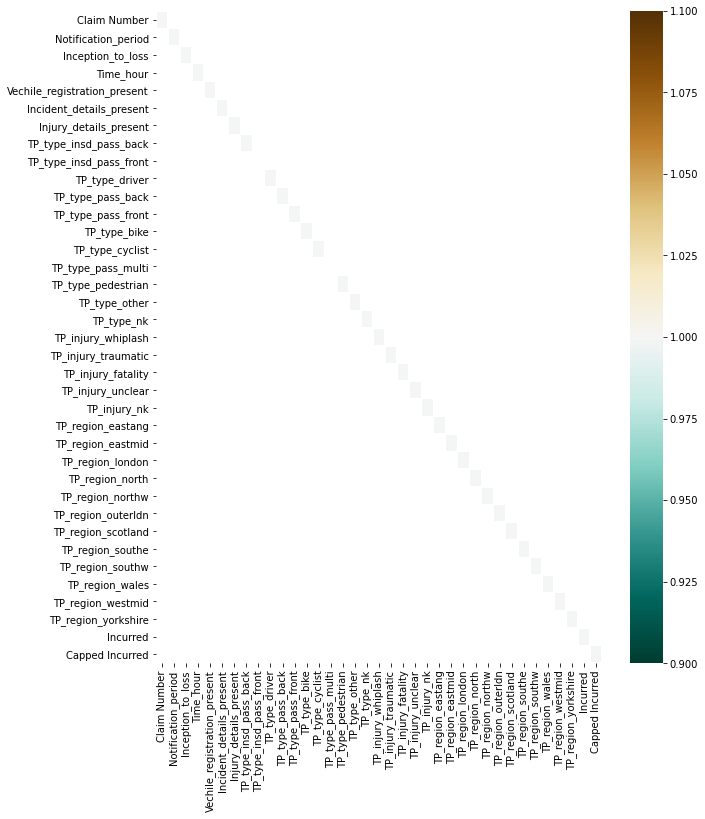

In [10]:
plt.figure(figsize=(10,12))
correlation = df.corr()
sns.heatmap(correlation, mask = correlation <0.8, linewidth=0.5, cmap='BrBG_r')

####There is no correlation between any two columns in the data

In [11]:
df.corr()[['Incurred']].sort_values(['Incurred'])

,Incurred
TP_type_nk,-0.064356
Claim Number,-0.022306
Incident_details_present,-0.002420
TP_type_cyclist,-0.001335
Notification_period,0.000417
Vechile_registration_present,0.003849
Inception_to_loss,0.005833
Time_hour,0.008816
TP_type_pedestrian,0.013353
TP_injury_unclear,0.018930


#Data Preprocessing

##Removing row with Special Character present in data

In [12]:
#Special character can be present only in the object type columns.
# And upon seeing the count plot for each object type column, we can see clearly that 
#only PH_considered_TP_at_fault column having '#' type special character.It is only one in count so droping row.
df=df.drop(df[df.PH_considered_TP_at_fault.str.contains(r'[@#&$%+*-]')].index)

##Finding Redundant columns

In [13]:
df.nunique()

Claim Number                    7690
date_of_loss                    3175
Notifier                           5
Loss_code                          1
Loss_description                   1
Notification_period              189
Inception_to_loss                366
Location_of_incident               8
Weather_conditions                 4
Vehicle_mobile                     3
Time_hour                         24
Main_driver                        3
PH_considered_TP_at_fault          3
Vechile_registration_present       2
Incident_details_present           2
Injury_details_present             2
TP_type_insd_pass_back             5
TP_type_insd_pass_front            1
TP_type_driver                     6
TP_type_pass_back                  7
TP_type_pass_front                 3
TP_type_bike                       3
TP_type_cyclist                    2
TP_type_pass_multi                 1
TP_type_pedestrian                 2
TP_type_other                      7
TP_type_nk                         6
T

####As Loss_code, Loss_description,TP_type_insd_pass_front,TP_type_pass_multi etc.  are having only one value for more than 96% which lead to no information addition. Droping all these columns will not impact data.

In [14]:
col = df.columns
overfit_col = []
for i in col:
    counts = df[i].value_counts()
    cnt = counts.iloc[0]
    
    if cnt / len(df) * 100 > 96:
        print(cnt,len(df))
        overfit_col.append(i)
overfit_col

7690 7690
7690 7690
7684 7690
7530 7690
7690 7690
7463 7690
7636 7690
7686 7690
7690 7690
7689 7690
7664 7690
7445 7690
7566 7690
7527 7690
7456 7690
7572 7690


['Loss_code',
 'Loss_description',
 'Vechile_registration_present',
 'TP_type_insd_pass_back',
 'TP_type_insd_pass_front',
 'TP_type_pass_back',
 'TP_type_bike',
 'TP_type_cyclist',
 'TP_type_pass_multi',
 'TP_type_pedestrian',
 'TP_injury_fatality',
 'TP_region_eastang',
 'TP_region_london',
 'TP_region_north',
 'TP_region_outerldn',
 'TP_region_scotland']

In [15]:
df=df.drop(overfit_col, axis=1)

In [16]:
#update numeric columns
numeric_col=df.select_dtypes(exclude=['object']).columns.to_list()
numeric_col

['Claim Number',
 'Notification_period',
 'Inception_to_loss',
 'Time_hour',
 'Incident_details_present',
 'Injury_details_present',
 'TP_type_driver',
 'TP_type_pass_front',
 'TP_type_other',
 'TP_type_nk',
 'TP_injury_whiplash',
 'TP_injury_traumatic',
 'TP_injury_unclear',
 'TP_injury_nk',
 'TP_region_eastmid',
 'TP_region_northw',
 'TP_region_southe',
 'TP_region_southw',
 'TP_region_wales',
 'TP_region_westmid',
 'TP_region_yorkshire',
 'Incurred',
 'Capped Incurred']

##Finding Null values in data frame

In [17]:
df.isnull().sum()

Claim Number                   0
date_of_loss                   0
Notifier                       0
Notification_period            0
Inception_to_loss              0
Location_of_incident           0
Weather_conditions           344
Vehicle_mobile                 0
Time_hour                      0
Main_driver                    0
PH_considered_TP_at_fault      0
Incident_details_present       0
Injury_details_present         0
TP_type_driver                 0
TP_type_pass_front             0
TP_type_other                  0
TP_type_nk                     0
TP_injury_whiplash             0
TP_injury_traumatic            0
TP_injury_unclear              0
TP_injury_nk                   0
TP_region_eastmid              0
TP_region_northw               0
TP_region_southe               0
TP_region_southw               0
TP_region_wales                0
TP_region_westmid              0
TP_region_yorkshire            0
Incurred                       0
Capped Incurred                0
dtype: int

##Treating the Missing values

In [18]:
df['Weather_conditions']=df.groupby('date_of_loss')['Weather_conditions'].fillna(df['Weather_conditions'].mode()[0])
df['Weather_conditions'].unique()

array(['NORMAL', 'WET', 'N/K', 'SNOW,ICE,FOG'], dtype=object)

##Multicollinearity Check to remove redundant columns

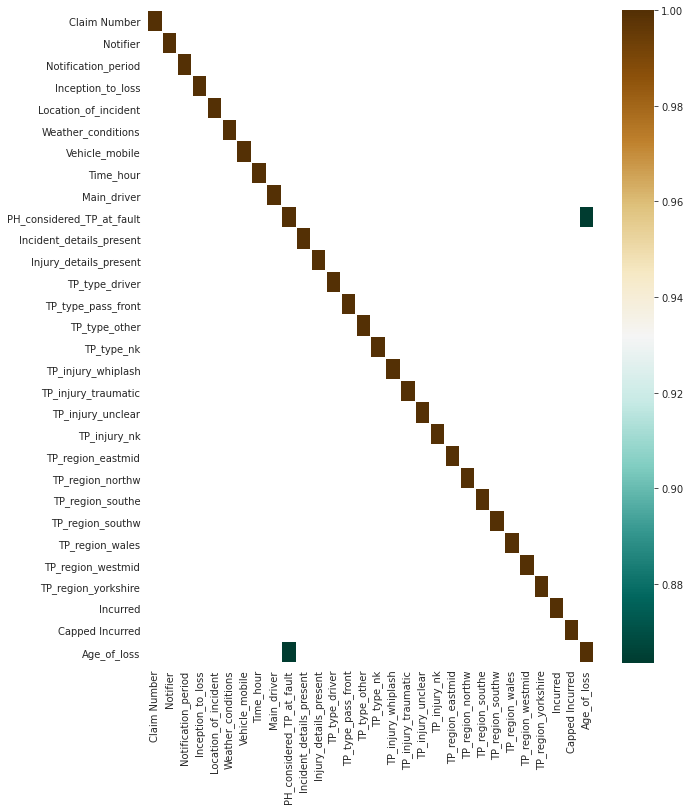

In [232]:
plt.figure(figsize=(10,12))
correlation = df.corr()
sns.heatmap(correlation, mask = correlation <0.8, linewidth=0.5, cmap='BrBG_r')

#Feature Engineering

##Date_of_loss is date field which is not giving particular info. So, instead of using it directly, we can take how old that loss is.

In [20]:
df['Age_of_loss']=(pd.datetime(2021, 7, 18)-pd.to_datetime(df['date_of_loss'])).dt.days

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [21]:
df=df.drop('date_of_loss',axis=1)

##Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder
lbl_en=LabelEncoder()
for i in df.select_dtypes(exclude=['int64','float64']).columns:
  df[i]=lbl_en.fit_transform(df[i])

##Splitting the Data

In [23]:
y=df[df.Incurred!=0].loc[:, df.columns == 'Incurred']
x=df[df.Incurred!=0].loc[:, df.columns != 'Incurred']

In [24]:
x_test2=df[df.Incurred==0].loc[:, df.columns != 'Incurred']
y_test2=df[df.Incurred==0].loc[:, df.columns == 'Incurred']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2020)

##Data Scaling

In [26]:
from sklearn.preprocessing import Normalizer
import numpy as np
scale=Normalizer()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

#Modeling

In [158]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from sklearn import ensemble
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from mlxtend.regressor import StackingCVRegressor


##Linear Regression just for testing

In [96]:
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.predict(X_test))
regr.score(X_test,y_test)

[14071.5855099  57121.94619463  6428.59231589 ... 14096.05032437
 17370.96643534 12019.77045342]


0.22073034279120085

In [69]:
# Define error metrics
def cv_rmse(model, X=X_train):
    rmse = np.sqrt(-cross_val_score(model, X, y_train, scoring="neg_mean_squared_error", cv=10))
    return (rmse)

In [155]:
cv_rmse(regr).mean()

51816.08317822289

##Random Forest

In [152]:
rf = RandomForestRegressor()
rf_model_full_data=rf.fit(X_train,y_train)
score_rf=rf_model_full_data.score(X_test,y_test)
score_rf

0.43018339386312293

In [156]:
rmse_rf=cv_rmse(rf_model_full_data).mean()
rmse_rf

48216.97949912829

##XGBoost 

In [28]:
#Without tunning
xgb = XGBRegressor(booster='gbtree', objective='reg:squarederror')

param_lst = {
    'learning_rate' : [0.01, 0.1, 0.15, 0.3, 0.5],
    'n_estimators' : [100, 500, 1000, 2000, 3000],
    'max_depth' : [3, 6, 9],
    'min_child_weight' : [1, 5, 10, 20],
    'reg_alpha' : [0.001, 0.01, 0.1],
    'reg_lambda' : [0.001, 0.01, 0.1]
}

xgb_reg = RandomizedSearchCV(estimator = xgb, param_distributions = param_lst,
                              n_iter = 100, scoring = 'neg_root_mean_squared_error',
                              cv = 5)
       
xgb_search = xgb_reg.fit(X_train, y_train)

# XGB with tune hyperparameters
best_param = xgb_search.best_params_


In [130]:
best_param

{'feature_fraction': 0.4,
 'lambda_l1': 0.001,
 'lambda_l2': 0,
 'learning_rate': 0.001,
 'max_depth': 10,
 'min_child_samples': 5,
 'n_estimators': 1500}

In [48]:
xgb=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.001, max_delta_step=0,
             max_depth=9, min_child_weight=10, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective ='reg:squarederror', random_state=0,
             reg_alpha=0.001, reg_lambda=0.001, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [60]:
xgb_best=xgb.fit(X_train, y_train)

In [144]:
score_xgb=xgb_best.score(X_test, y_test)
score_xgb

0.4749497517080564

In [147]:
rmse_xgb=cv_rmse(xgb_best).mean()
rmse_xgb

48161.36888219478

##LightBGM

In [30]:
lgbm = LGBMRegressor(boosting_type='gbdt',objective='regression', max_depth=-1,
                    lambda_l1=0.0001, lambda_l2=0, learning_rate=0.1,
                    n_estimators=100, max_bin=200, min_child_samples=20, 
                    bagging_fraction=0.75, bagging_freq=5,
                    bagging_seed=7, feature_fraction=0.8,
                    feature_fraction_seed=7, verbose=-1)

param_lst = {
    'max_depth' : [2, 5, 8, 10],
    'learning_rate' : [0.001, 0.01, 0.1, 0.2],
    'n_estimators' : [100, 300, 500, 1000, 1500],
    'lambda_l1' : [0.0001, 0.001, 0.01],
    'lambda_l2' : [0, 0.0001, 0.001, 0.01],
    'feature_fraction' : [0.4, 0.6, 0.8],
    'min_child_samples' : [5, 10, 20, 25]
}

lightgbm = RandomizedSearchCV(estimator = lgbm, param_distributions = param_lst,
                              n_iter = 100, scoring = 'neg_root_mean_squared_error',
                              cv = 5)
       
y = y_train.values.ravel()
y_train = np.array(y).astype(int)
lightgbm_search = lightgbm.fit(X_train, y_train)

# LightBGM with tuned hyperparameters
best_param = lightgbm_search.best_params_
lgbm = LGBMRegressor(**best_param)

In [81]:
lgbm.fit(X_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.4, importance_type='split', lambda_l1=0.001,
              lambda_l2=0, learning_rate=0.001, max_depth=10,
              min_child_samples=5, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1500, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [148]:
score_lgbm=lgbm.score(X_test,y_test)
score_lgbm

0.4478804718895203

In [149]:
rmse_lgbm=cv_rmse(lgbm).mean()
rmse_lgbm

45059.78925090378

##Results Comparison

In [153]:
model_performances = pd.DataFrame({
    "Model" : ["Random Forest", "XGBoost", "LGBM"],
    "RMSE" : [(rmse_rf), (rmse_xgb), (rmse_lgbm)],
    "Score" : [(score_rf), (score_xgb), (score_lgbm)]
})

print("Sorted by Score:")
print(model_performances.sort_values(by="Score", ascending=False))

Sorted by Score:
           Model          RMSE     Score
1        XGBoost  48161.368882  0.474950
2           LGBM  45059.789251  0.447880
0  Random Forest  51816.083178  0.430183


In [235]:
scores={}
scores['rf']=(score_rf)
scores['xgb']=(score_xgb)
scores['lgbm']=(score_lgbm)

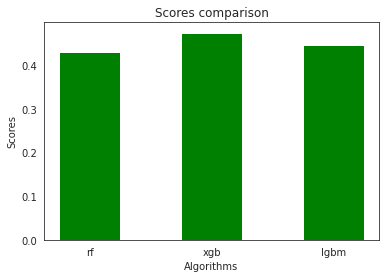

In [236]:
plt.bar(scores.keys(), scores.values(), width=0.5,color='g')
plt.xlabel("Algorithms")
plt.ylabel("Scores")
plt.title("Scores comparison")
plt.show()

In [237]:
rmse={}
rmse['rf']=(rmse_rf)
rmse['xgb']=(rmse_xgb)
rmse['lgbm']=(rmse_lgbm)

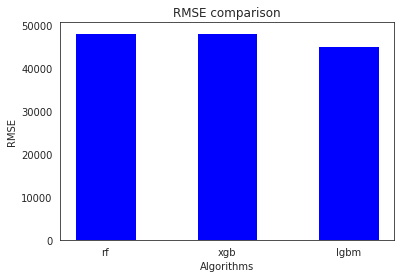

In [243]:
plt.bar(rmse.keys(), rmse.values(), width=0.5,color='b')
plt.xlabel("Algorithms")
plt.ylabel("RMSE")
plt.title("RMSE comparison")
plt.show()